In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\rajak\OneDrive\Documents\DATA\100-days-of-machine-learning\day42-outlier-removal-using-zscore\placement.csv')

In [3]:
df.sample(5)

,cgpa,placement_exam_marks,placed
495,6.95,64.0,1
866,7.29,35.0,0
931,7.19,33.0,0
762,6.79,14.0,1
477,5.78,18.0,0


In [5]:
df.shape

(1000, 3)

C:\Users\rajak\AppData\Local\Temp\ipykernel_18932\4129024742.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.cgpa)
C:\Users\rajak\AppData\Local\Temp\ipykernel_18932\4129024742.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.placement_exam_marks)


<AxesSubplot: xlabel='placement_exam_marks', ylabel='Density'>

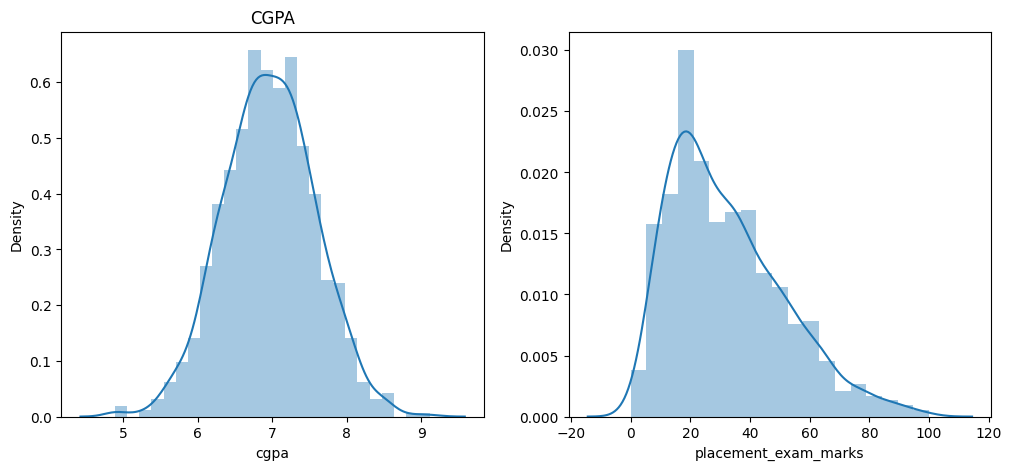

In [9]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(df.cgpa)
plt.title('CGPA')
plt.subplot(1,2,2)
sns.distplot(df.placement_exam_marks)

In [11]:
print('Mean of cgpa',df.cgpa.mean())
print('Max_cgpa',df.cgpa.max())
print('Min Cgpa',df.cgpa.min())
print('STD Cgpa',df.cgpa.std())

Mean of cgpa 6.96124
Max_cgpa 9.12
Min Cgpa 4.89
STD Cgpa 0.6158978751323896


In [13]:
#Finding the the boundaries of cgpa
print(df.cgpa.mean()+3*df.cgpa.std())
print(df.cgpa.mean()-3*df.cgpa.std())

8.808933625397168
5.113546374602832


In [15]:
#Finding the outliers
df[(df['cgpa']>8.8)| (df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [16]:
#Trimming the outliers
new_df=df[(df['cgpa']<8.8) & (df['cgpa']>5.11)]

In [17]:
new_df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [19]:
new_df.shape

(995, 3)

In [20]:
#Approach 2


In [21]:
df['cgpa_zscore']=(df.cgpa-df.cgpa.mean())/df.cgpa.std()

In [22]:
df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [26]:
#Finding Outliers
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [28]:
#Trimming
df[(df['cgpa_zscore'] < 3) &  (df['cgpa_zscore'] >-3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


In [29]:
#Capping
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [30]:
df['cgpa']=np.where(df['cgpa']>upper_limit,
                   upper_limit,np.where(df['cgpa']<lower_limit,lower_limit,df['cgpa']))

In [31]:
df.shape

(1000, 4)

In [33]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64